In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pyvinecopulib as pv

In [43]:
d = 5
n = 10000
R = 1

In [3]:
pair_copulas = []
for t in range(d-1):
    cur = []
    pair_copulas.append(cur)
    for e in range(d-1-t):
        cur.append(pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[np.random.uniform()]))
        
cop = pv.Vinecop(matrix=np.array(
[
 [3,2,3,3,3],
 [2,3,2,2,0],
 [4,4,4,0,0],
 [1,1,0,0,0],
 [5,0,0,0,0]
]
), pair_copulas=pair_copulas)

In [4]:
u = cop.simulate(n, seeds=[1,2,3,4,5])

In [44]:
u1 = u[:,0][:, None]
u2 = u[:,1][:, None]
u3 = u[:,2][:, None]
u4 = u[:,3][:, None]
u5 = u[:,4][:, None]

In [54]:
dir(cop.get_pair_copula(0,0))

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'aic',
 'bic',
 'cdf',
 'family',
 'fit',
 'hfunc1',
 'hfunc2',
 'hinv1',
 'hinv2',
 'loglik',
 'mbic',
 'nobs',
 'npars',
 'parameters',
 'parameters_lower_bounds',
 'parameters_to_tau',
 'parameters_upper_bounds',
 'pdf',
 'rotation',
 'select',
 'simulate',
 'str',
 'tau',
 'tau_to_parameters',
 'to_json',
 'var_types']

In [ ]:
cop.get_pair_copula(0,0).hfunc1     /




In [ ]:
cop.get_pair_copula(0,0).hfunc1

In [48]:
out1 = []
out2 = []
for i in range(R):
    v = np.random.uniform(size=n)[:, None]
    u5_1 = cop.get_pair_copula(3,0).hinv2(np.hstack([v, u1]))[:, None]
    u5_14 = cop.get_pair_copula(2,0).hinv2(np.hstack([u5_1, u4]))[:, None]
    u5_142 = cop.get_pair_copula(1,0).hinv2(np.hstack([u5_14, u2]))[:, None]
    u5_1423 = cop.get_pair_copula(0,0).hinv2(np.hstack([u5_142, u3]))[:, None]
    out1.append(u5_1423)    
    
    r1 = cop.get_pair_copula(0,0).hfun(np.hstack([v, u3]))[:, None]
    r2 = cop.get_pair_copula(1,0).hinv2(np.hstack([r1, u2]))[:, None]
    r3 = cop.get_pair_copula(2,0).hinv2(np.hstack([r2, u4]))[:, None]
    r4 = cop.get_pair_copula(3,0).hinv2(np.hstack([r3, u1]))[:, None]
    out2.append(r4)

In [39]:
def make_plot(test):
    u_lst = [u1,u2,u3,u4,u5]
    fig, axes = plt.subplots(1,5,figsize=(12,1))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.scatter(test, u_lst[i])
        print('{:,.4f}'.format(np.corrcoef(np.ravel(test), np.ravel(u_lst[i]))[0,1]), end=' ')

0.2141 0.3649 0.2886 0.3859 1.0000 

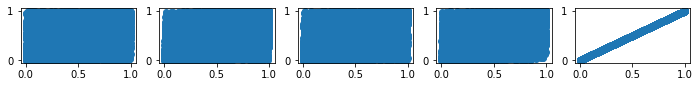

In [40]:
make_plot(u[:,4])

0.4878 0.5678 0.6137 0.4101 0.2714 

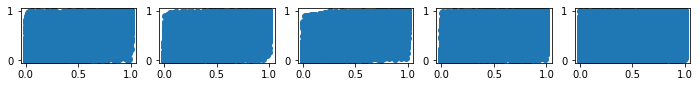

In [49]:
make_plot(np.mean(np.array(out1),axis=0))

0.4907 0.5595 0.6078 0.4214 0.2737 

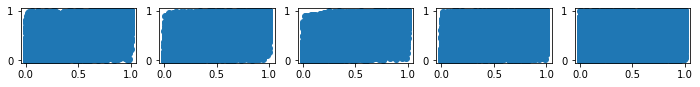

In [50]:
make_plot(np.mean(np.array(out2),axis=0))